### *Data Analysis*
## Preliminary Analysis
---
Goal: categorize US and EU debates into relevant and second tier and construct individual speaker datasets <br> <br>
*conducted in March and April 2022*

In [2]:
# Import necessary libraries
from bs4 import BeautifulSoup
import nltk, re, pprint
from nltk import word_tokenize
from nltk import FreqDist
import os.path 
import pandas as pd
import os
from collections import Counter
import re
from nltk.corpus import PlaintextCorpusReader 
from nltk.app import concordance
from nltk.corpus import BracketParseCorpusReader
import glob
import numpy as np
import statsmodels.formula.api as smf
import altair as alt
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
import shutil
from nltk.probability import FreqDist
import statistics

/Users/charlottekaiser/miniforge3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


---
### 1. Prepare data for preliminary analysis
---

In [29]:
# Set directory of intermediate files as location for text corpus
files = ".*\.txt"
save_path = '/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/30_nltk_corpus'

In [30]:
corpus_root = '/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/20_intermediate_files'
# corpus0 = PlaintextCorpusReader(corpus_root, files)
# list = corpus0.fileids()


In [31]:
os.listdir('.')
os.chdir('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/20_intermediate_files')


In [32]:
# Loop to output the absolute and the relative frequency of the term "artificial" per debate
for files in sorted(os.listdir(corpus_root)):
        if files.endswith('.txt'):
                if len(files) == 0:
                        continue
                print(files)
                file = PlaintextCorpusReader(corpus_root, files) 
                file  = nltk.Text(file.words())  
                file_name = files[:-4]
                completeName = os.path.join(save_path, file_name)
                output = open(completeName, 'w')
                print(file, file=output)
                print(file.count("artificial")) ## results were added to an Excel File
                print(100 * file.count("artificial") / len(file)) ## the results were added to an Excel File

EU01_European Skills Agenda for sustainable competitiveness, social fairness and resilience.txt
2
0.014324595330181922
EU02_Democratic scrutiny of social media and the protection of fundamental rights.txt
4
0.007346054250610641
EU03_European strategy for data - Commission evaluation report on the implementation of the General Data Protection Regulation two years after its application.txt
5
0.0671952694530305
EU04_Preparation of the European Council meeting of 25 and 26 March 2021 – Digital Green Certificate.txt
0
0.0
EU05_Shaping digital education policy - short presentation.txt
3
0.056667925953910084
EU06_European Semester - annual sustainable growth strategy 2021 – European Semester - employment and social aspects in the annual sustainable growth strategy 2021.txt
2
0.0037488987609889594
EU07_Conclusions of the European Council meeting of 25 and 26 March 2021 - The outcome of the high level meeting between the EU and Turkey of the 6th of April.txt
1
0.003323584153150758
EU08_Justice 

The relevant parameters (i.e. debate title, whether the debate was held in the EU or the US, the absolute occurrence of the token 'artificial', the percentage share relative to the length of the text) were transported into an Excel file and prepared for further analysis with Python. 

---
### 2. Conduct quantiative section of preliminary analysis: categorize into relevant and second tier debates
---
#### 2.1 Import excel file that was created in step 1

In [33]:
# Load dataset
input = pd.read_excel(r'/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/40_preliminary_analysis/data.xlsx')

In [34]:
# Split dataset 
eu = input[input.loc[:,'level'] == "EU"]
us = input[input.loc[:,'level'] == "US"]

In [35]:
# Generate average values
eu["mean_absolute_eu"] = eu["absolute_token"].mean() # avg occurrence of 'artificial' in EU debates
eu["mean_percentage_eu"] = eu["percentage_rel"].mean() # avg % share of the word relative to the length of the text 
us["mean_absolute_us"] = us["absolute_token"].mean()  # avg occurrence of 'artificial' in US debates
us["mean_percentage_us"] = us["percentage_rel"].mean() # avg % share of the word relative to the length of the text 

/var/folders/h9/g02cmrsn6y571zb1v96gs56c0000gn/T/ipykernel_96633/3590738180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu["mean_absolute_eu"] = eu["absolute_token"].mean() # avg occurrence of 'artificial' in EU debates
/var/folders/h9/g02cmrsn6y571zb1v96gs56c0000gn/T/ipykernel_96633/3590738180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu["mean_percentage_eu"] = eu["percentage_rel"].mean() # avg % share of the word relative to the length of the text
/var/folders/h9/g02cmrsn6y571zb1v96gs56c

---
#### 2.2 Visual presenation for the EU

In [36]:
# Absolute token
base1 = (
    alt.Chart(eu, title="Absolute frequency of token 'artificial' - EU")
    .mark_point()
    .encode(
        x=alt.X("debates", title="Corresponding debate", scale=alt.Scale(zero=False)),
        y=alt.Y("absolute_token", title="Absolute frequency (in real numbers)", scale=alt.Scale(zero=False)),
        tooltip="level"
).interactive()
)


text1 = (alt.Chart(eu)
    .encode(
        x=alt.X("debates", scale=alt.Scale(zero=False)),
        y="absolute_token",
        text="level"
    )
    .mark_text(size=5)
    
)

rule1 = alt.Chart(eu).mark_rule(color='blue').encode(
    y='mean_absolute_eu'
)

base1 + rule1 + text1

alt.LayerChart(...)

In [37]:
# Relative percentage
base2 = (
    alt.Chart(eu, title="Percentage share of token relative to text length - EU")
    .mark_point()
    .encode(
        x=alt.X("debates", title="Corresponding debate", scale=alt.Scale(zero=False)),
        y=alt.Y("percentage_rel", title="Relative % share (scale 0-100%)", scale=alt.Scale(zero=False)),
        tooltip="level"
).interactive()
)


text2 = (alt.Chart(eu)
    .encode(
        x=alt.X("debates", scale=alt.Scale(zero=False)),
        y="percentage_rel",
        text="level"
    )
    .mark_text(size=5)
    
)

rule2 = alt.Chart(eu).mark_rule(color='blue').encode(
    y='mean_percentage_eu'
)

base2 + rule2 + text2

alt.LayerChart(...)

---
#### 2.3 Visual presenation for the US

In [38]:
# Absolute token
base3 = (
    alt.Chart(us, title="Absolute frequency of token 'artificial' - US")
    .mark_point()
    .encode(
        x=alt.X("debates", title="Corresponding debate", scale=alt.Scale(zero=False)),
        y=alt.Y("absolute_token", title="Absolute frequency (in real numbers)", scale=alt.Scale(zero=False)),
        tooltip="level"
).interactive()
)


text3 = (alt.Chart(us)
    .encode(
        x=alt.X("debates", scale=alt.Scale(zero=False)),
        y="absolute_token",
        text="level"
    )
    .mark_text(size=5)
    
)

rule3 = alt.Chart(us).mark_rule(color='red').encode(
    y='mean_absolute_us'
)

base3 + rule3 + text3

alt.LayerChart(...)

In [39]:
# Relative percentage
base4 = (
    alt.Chart(us, title="Percentage share of token relative to text length - US")
    .mark_point()
    .encode(
        x=alt.X("debates", title="Corresponding debate", scale=alt.Scale(zero=False)),
        y=alt.Y("percentage_rel", title="Relative % share (scale 0-100%)", scale=alt.Scale(zero=False)),
        tooltip="level"
).interactive()
)


text4 = (alt.Chart(us)
    .encode(
        x=alt.X("debates", scale=alt.Scale(zero=False)),
        y="percentage_rel",
        text="level"
    )
    .mark_text(size=5)
    
)

rule4 = alt.Chart(us).mark_rule(color='red').encode(
    y='mean_percentage_us'
)

base4 + rule4 + text4

alt.LayerChart(...)

---
#### 2.4 Joint descriptives and visuals

In [40]:
# List debates where relative frequency > average 
list = eu["mean_percentage_eu"] 
list2 = us["mean_percentage_us"]
means = list.append(list2)
list3 = eu["mean_absolute_eu"]
list4 = us["mean_absolute_us"]
means2 = list3.append(list4)

/var/folders/h9/g02cmrsn6y571zb1v96gs56c0000gn/T/ipykernel_96633/3419539613.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = list.append(list2)
/var/folders/h9/g02cmrsn6y571zb1v96gs56c0000gn/T/ipykernel_96633/3419539613.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means2 = list3.append(list4)


In [41]:
# Add means parameter to full dataset
input["means"] = means
input["means2"] = means2

In [42]:
# Create indicator on relevant debates
input["relevant_debates"] = (input["percentage_rel"] > input["means"])
input["relevant_debates"] = [1 if x ==True else 0 for x in input['relevant_debates']]
input["relevant_debates"] = input['relevant_debates'].replace(1 , "Yes").copy()
input["relevant_debates"] = input['relevant_debates'].replace(0, "No").copy()

In [43]:
# Create additional robustness indicator
input["robustness"] = (input["absolute_token"] > input["means2"])
input["robustness"] = [1 if x ==True else 0 for x in input['robustness']]
input["robustness"] = input['robustness'].replace(1 , "Yes").copy()
input["robustness"] = input['robustness'].replace(0, "No").copy()

In [44]:
# Split datasets: new dataset only contains the relevant debates from the EU and US
relevant = input[input.loc[:,'relevant_debates'] == "Yes"]
robustness = input[input.loc[:,'robustness'] == "Yes"]

In [45]:
relevant

,level,debates,absolute_token,percentage_rel,means,means2,relevant_debates,robustness
2,EU,EU03_European strategy for data - Commission e...,5,0.067195,0.065187,13.523810,Yes,No
10,EU,EU11_Digital Europe programme.txt,17,0.097137,0.065187,13.523810,Yes,Yes
12,EU,"EU13_Artificial intelligence in education, cul...",60,0.419992,0.065187,13.523810,Yes,Yes
13,EU,EU14_Digital future of Europe- digital single ...,109,0.312419,0.065187,13.523810,Yes,Yes
17,EU,EU18_Artificial intelligence in criminal law a...,51,0.224997,0.065187,13.523810,Yes,Yes
22,US,US02_CONSUMER SAFETY TECHNOLOGY ACT.txt,17,0.186179,0.041753,2.578947,Yes,Yes
24,US,US04_FEDERAL CAREER OPPORTUNITIES IN COMPUTER ...,4,0.108903,0.041753,2.578947,Yes,Yes
26,US,US06_75th ANNIVERSARY OF THE OFFICE OF NAVAL R...,2,0.058428,0.041753,2.578947,Yes,No
29,US,US09_MSI STEM ACHIEVEMENT ACT.txt,1,0.042845,0.041753,2.578947,Yes,No
31,US,US11_HONORING THE SEVEN INVENTORS INDUCTED TO ...,1,0.047371,0.041753,2.578947,Yes,No


In [46]:
robustness

,level,debates,absolute_token,percentage_rel,means,means2,relevant_debates,robustness
10,EU,EU11_Digital Europe programme.txt,17,0.097137,0.065187,13.523810,Yes,Yes
12,EU,"EU13_Artificial intelligence in education, cul...",60,0.419992,0.065187,13.523810,Yes,Yes
13,EU,EU14_Digital future of Europe- digital single ...,109,0.312419,0.065187,13.523810,Yes,Yes
17,EU,EU18_Artificial intelligence in criminal law a...,51,0.224997,0.065187,13.523810,Yes,Yes
20,EU,EU21_The outcome of the EU-US Trade and Techno...,14,0.049461,0.065187,13.523810,No,Yes
22,US,US02_CONSUMER SAFETY TECHNOLOGY ACT.txt,17,0.186179,0.041753,2.578947,Yes,Yes
24,US,US04_FEDERAL CAREER OPPORTUNITIES IN COMPUTER ...,4,0.108903,0.041753,2.578947,Yes,Yes
30,US,US10_National Defense Authorization Act.txt,14,0.011804,0.041753,2.578947,No,Yes
36,US,US16_DEPARTMENT OF ENERGY SCIENCE FOR THE FUTU...,3,0.031198,0.041753,2.578947,No,Yes
52,US,US32_NATIONAL PULSE MEMORIAL.txt,3,0.010649,0.041753,2.578947,No,Yes


---
#### 2.6 Visual presentation

In [47]:
# Create mean parameters for joint dataset
relevant["means_eu"] = eu["mean_percentage_eu"]
relevant["means_us"] = us["mean_percentage_us"]
robustness["means2_eu"] = eu["mean_absolute_eu"]
robustness["means2_us"] = us["mean_absolute_us"]

/var/folders/h9/g02cmrsn6y571zb1v96gs56c0000gn/T/ipykernel_96633/1435441985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant["means_eu"] = eu["mean_percentage_eu"]
/var/folders/h9/g02cmrsn6y571zb1v96gs56c0000gn/T/ipykernel_96633/1435441985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant["means_us"] = us["mean_percentage_us"]
/var/folders/h9/g02cmrsn6y571zb1v96gs56c0000gn/T/ipykernel_96633/1435441985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [48]:
# And create split datasets for visuals - relevant debates
eu_rel = relevant[relevant.loc[:,'level'] == "EU"]
us_rel = relevant[relevant.loc[:,'level'] == "US"]

In [49]:
# And create split datasets for visuals - debates to be included for robustness
eu_rob = robustness[robustness.loc[:,'level'] == "EU"]
us_rob = robustness[robustness.loc[:,'level'] == "US"]

---
##### 2.6.1 Visual presentation of relevant debates graphs

In [50]:
# Relative percentage EU
base5 = (
    alt.Chart(eu_rel, title="EU")
    .mark_point()
    .encode(
        x=alt.X("debates", title="Corresponding debate", scale=alt.Scale(zero=False)),
        y=alt.Y("percentage_rel", title="Relative % share (scale 0-100%)", scale=alt.Scale(zero=False)),
        tooltip="level"
).interactive()
)


text5 = (alt.Chart(eu_rel)
    .encode(
        x=alt.X("debates", scale=alt.Scale(zero=False)),
        y="percentage_rel",
        text="level"
    )
    .mark_text(size=5)
    
)

rule5= alt.Chart(eu_rel).mark_rule(color='blue').encode(
    y=('means_eu')
)



eu = base5 + rule5 + text5 

In [51]:
# Relative percentage US
base6 = (
    alt.Chart(us_rel, title="US")
    .mark_point()
    .encode(
        x=alt.X("debates", title="Corresponding debate", scale=alt.Scale(zero=False)),
        y=alt.Y("percentage_rel", title="", scale=alt.Scale(zero=False)),
        tooltip="level"
).interactive()
)


text6 = (alt.Chart(us_rel)
    .encode(
        x=alt.X("debates", scale=alt.Scale(zero=False)),
        y="percentage_rel",
        text="level"
    )
    .mark_text(size=5)
    
)

rule6 = alt.Chart(us_rel).mark_rule(color='red').encode(
    y=('means_us')
)



us = base6 + rule6 + text6 

In [52]:
eu | us 

alt.HConcatChart(...)

---
##### 2.6.2 Visual presentation of debates to be included for robustness

In [53]:
# Absolute token EU
base7 = (
    alt.Chart(eu_rob, title="EU")
    .mark_point()
    .encode(
        x=alt.X("debates", title="Corresponding debate", scale=alt.Scale(zero=False)),
        y=alt.Y("absolute_token", title="Absolute number of occurrence of 'artificial' in text", scale=alt.Scale(zero=False)),
        tooltip="level"
).interactive()
)


text7 = (alt.Chart(eu_rob)
    .encode(
        x=alt.X("debates", scale=alt.Scale(zero=False)),
        y="absolute_token",
        text="level"
    )
    .mark_text(size=5)
    
)

rule7= alt.Chart(eu_rob).mark_rule(color='blue').encode(
    y=('means2_eu')
)



eu2 = base7 + rule7 + text7

In [54]:
# Absolute token US
base8 = (
    alt.Chart(us_rob, title="US")
    .mark_point()
    .encode(
        x=alt.X("debates", title="Corresponding debate", scale=alt.Scale(zero=False)),
        y=alt.Y("absolute_token", title="", scale=alt.Scale(zero=False)),
        tooltip="level"
).interactive()
)


text8 = (alt.Chart(us_rob)
    .encode(
        x=alt.X("debates", scale=alt.Scale(zero=False)),
        y="absolute_token",
        text="level"
    )
    .mark_text(size=5)
    
)

rule8 = alt.Chart(us_rob).mark_rule(color='red').encode(
    y=('means2_us')
)



us2 = base8 + rule8 + text8

In [55]:
eu2 | us2

alt.HConcatChart(...)

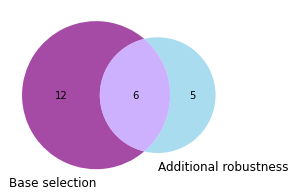

In [56]:
plt.figure(figsize=(4,4))
set1 = set(relevant['debates'])
set2 = set(robustness['debates'])

venn2([set1, set2], ('Base selection', 'Additional robustness'), set_colors=('purple', 'skyblue'), alpha = 0.7)

plt.show()
plt.show()


---
### 3. Conduct qualitative section of preliminary analysis

*I complement the quantitative preliminary analysis with a two-fold qualitative validation.
During this preliminary analysis I counted the single token ‘artificial’ instead of tokenizing the text into bi-grams and conducting a multi-word search for ‘artificial intelligence’. The approach of single word counting represents a caveat as it assumes that ‘artificial’ always comes up in connection with ‘intelligence’. If ‘artificial’ were to come up in any context unrelated to AI, my method would pick up on it. Nevertheless, while underestimation of relevance would be problematic and possibly lead to omitting relevant debates, overestimation can be controlled for ex post. After qualitatively examining the debates that were chosen as relevant it can be determined that the method really picks up only on ‘artificial intelligence’ and not on other concepts related to ‘artificial’. Still, not all debates can withstand the qualitative validation: Some debate AI, yet do not engage purely with the concept. While this still holds some substantial value it cannot be compared to the other debates in terms of the depth and extent of the AI debate.
Second, all debates that were flagged as second tier are briefly skimmed. Two debates are qualitatively assessed as relevant a posteriori. Apart from those it can be determined that all second-tier debates indeed discuss AI, however, do not engage with the concept in a detailed and informative way.* 


---
#### 4. Prepare own corpus from intermediate files - aggregate analysis, debate-level

In [57]:
os.chdir('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/20_intermediate_files')

In [58]:
save_path2 = '/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/50_analysis/text_files_aggregate'

In [59]:
# All previously flagged relevant debates
relevant_files = [
"EU02_Democratic scrutiny of social media and the protection of fundamental rights.txt", 
"EU03_European strategy for data - Commission evaluation report on the implementation of the General Data Protection Regulation two years after its application.txt",
"EU11_Digital Europe programme.txt", 
"EU13_Artificial intelligence in education, culture and the audiovisual sector.txt", 
"EU14_Digital future of Europe- digital single market and use of AI for European consumers.txt",
"EU15_ Promoting gender equality in science, technology, engineering and mathematics - STEM - education and careers.txt",
"EU18_Artificial intelligence in criminal law and its use by the police and judicial authorities in criminal matters.txt", 
"EU21_The outcome of the EU-US Trade and Technology Council.txt", 
"US02_CONSUMER SAFETY TECHNOLOGY ACT.txt", 
"US04_FEDERAL CAREER OPPORTUNITIES IN COMPUTER SCIENCE WORK ACT.txt", 
"US06_75th ANNIVERSARY OF THE OFFICE OF NAVAL RESEARCH.txt",
"US09_MSI STEM ACHIEVEMENT ACT.txt", 
"US10_National Defense Authorization Act.txt", 
"US15_FUTURE OF RADAR.txt", "US16_DEPARTMENT OF ENERGY SCIENCE FOR THE FUTURE ACT.txt",
"US18_STATEMENTS ON INTRODUCED BILLS AND JOINT RESOLUTIONS.txt", 
"US20_INTRODUCTION OF THE TRANSATLANTIC TELECOMMUNICATIONS SECURITY ACT.txt",
"US32_NATIONAL PULSE MEMORIAL.txt", 
"US37_ENDLESS FRONTIER ACT.txt"]

In [60]:
# Copy them to the analysis folder for reference
for files in relevant_files:
    shutil.copy(files, save_path2)

In [61]:
# Change directory 
os.listdir('.')
os.chdir('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/50_analysis/text_files_aggregate')

# Read in files
raw_eu02 = open("EU02_Democratic scrutiny of social media and the protection of fundamental rights.txt").read()
raw_eu03 = open("EU03_European strategy for data - Commission evaluation report on the implementation of the General Data Protection Regulation two years after its application.txt").read()
raw_eu11 = open("EU11_Digital Europe programme.txt").read()
raw_eu13 = open("EU13_Artificial intelligence in education, culture and the audiovisual sector.txt").read()
raw_eu14 = open("EU14_Digital future of Europe- digital single market and use of AI for European consumers.txt").read()
raw_eu15 = open("EU15_ Promoting gender equality in science, technology, engineering and mathematics - STEM - education and careers.txt").read()
raw_eu18 = open("EU18_Artificial intelligence in criminal law and its use by the police and judicial authorities in criminal matters.txt").read()
raw_eu21 = open("EU21_The outcome of the EU-US Trade and Technology Council.txt").read()
raw_us02 = open("US02_CONSUMER SAFETY TECHNOLOGY ACT.txt").read()
raw_us04 = open("US04_FEDERAL CAREER OPPORTUNITIES IN COMPUTER SCIENCE WORK ACT.txt").read()
raw_us06 = open("US06_75th ANNIVERSARY OF THE OFFICE OF NAVAL RESEARCH.txt").read()
raw_us09 = open("US09_MSI STEM ACHIEVEMENT ACT.txt").read()
raw_us10 = open("US10_National Defense Authorization Act.txt").read()
raw_us15 = open("US15_FUTURE OF RADAR.txt").read()
raw_us16 = open("US16_DEPARTMENT OF ENERGY SCIENCE FOR THE FUTURE ACT.txt").read()
raw_us18 = open("US18_STATEMENTS ON INTRODUCED BILLS AND JOINT RESOLUTIONS.txt").read()
raw_us20 = open("US20_INTRODUCTION OF THE TRANSATLANTIC TELECOMMUNICATIONS SECURITY ACT.txt").read()
raw_us32 = open("US32_NATIONAL PULSE MEMORIAL.txt").read()
raw_us37 = open("US37_ENDLESS FRONTIER ACT.txt").read()

In [62]:
# Briefly check lenght of debates for sample documentation
fdist = FreqDist(raw_eu02)
fdist.N() #166284
fdist = FreqDist(raw_eu03)
fdist.N() #22515
fdist = FreqDist(raw_eu11)
fdist.N() #54791
fdist = FreqDist(raw_eu13)
fdist.N() #45277
fdist = FreqDist(raw_eu14)
fdist.N() #108386
fdist = FreqDist(raw_eu15)
fdist.N() #54350
fdist = FreqDist(raw_eu18)
fdist.N() #69042
fdist = FreqDist(raw_eu21)
fdist.N() #85058
fdist = FreqDist(raw_us02)
fdist.N() #28488
fdist = FreqDist(raw_us04)
fdist.N() #11570
fdist = FreqDist(raw_us06)
fdist.N() #11060
fdist = FreqDist(raw_us06)
fdist.N() #11060
fdist = FreqDist(raw_us09)
fdist.N() #7310
fdist = FreqDist(raw_us10)
fdist.N() #357957
fdist = FreqDist(raw_us16)
fdist.N() #29232
fdist = FreqDist(raw_us18)
fdist.N() #3880
fdist = FreqDist(raw_us20)
fdist.N() #4608
fdist = FreqDist(raw_us32)
fdist.N() #84897
fdist = FreqDist(raw_us37)
fdist.N() #456184

length_sample = [166284 , 22515 , 54791 , 45277 , 108386 , 54350 , 69042, 85058 , 28488 , 11570 , 11060 , 11060 , 7310 , 357957 , 29232 , 3880, 4608, 84897, 456184]

# Check if all are recorded
len(length_sample)

19

In [63]:
# Record total sum 
sum(length_sample) # 1611949

1611949

In [83]:
# Record mean and standard deviation
statistics.stdev(length_sample) #122187.1314224919
statistics.mean(length_sample) #84839.42105263157
print(min(length_sample))

3880


In [65]:
# Save relevant debates to dataframe
data = {'eu':[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'debate': ["EU02_Democratic scrutiny of social media and the protection of fundamental rights.txt", "EU03_European strategy for data - Commission evaluation report on the implementation of the General Data Protection Regulation two years after its application.txt",
"EU11_Digital Europe programme.txt", 
"EU13_Artificial intelligence in education, culture and the audiovisual sector.txt", 
"EU14_Digital future of Europe- digital single market and use of AI for European consumers.txt",
"EU15_ Promoting gender equality in science, technology, engineering and mathematics - STEM - education and careers.txt",
"EU18_Artificial intelligence in criminal law and its use by the police and judicial authorities in criminal matters.txt", 
"EU21_The outcome of the EU-US Trade and Technology Council.txt", 
"US02_CONSUMER SAFETY TECHNOLOGY ACT.txt", 
"US04_FEDERAL CAREER OPPORTUNITIES IN COMPUTER SCIENCE WORK ACT.txt", 
"US06_75th ANNIVERSARY OF THE OFFICE OF NAVAL RESEARCH.txt",
"US09_MSI STEM ACHIEVEMENT ACT.txt", 
"US10_National Defense Authorization Act.txt", 
"US15_FUTURE OF RADAR.txt", "US16_DEPARTMENT OF ENERGY SCIENCE FOR THE FUTURE ACT.txt",
"US18_STATEMENTS ON INTRODUCED BILLS AND JOINT RESOLUTIONS.txt", 
"US20_INTRODUCTION OF THE TRANSATLANTIC TELECOMMUNICATIONS SECURITY ACT.txt",
"US32_NATIONAL PULSE MEMORIAL.txt", 
"US37_ENDLESS FRONTIER ACT.txt"],
        'text': [raw_eu02, raw_eu03, raw_eu11, raw_eu13, raw_eu14, raw_eu15, raw_eu18, raw_eu21, raw_us02, raw_us04, raw_us06, raw_us09, raw_us10, raw_us15, raw_us16, raw_us18, raw_us20, raw_us32, raw_us37]}
 
# Create DataFrame
raw_corpus = pd.DataFrame(data)

In [66]:
raw_corpus

,eu,debate,text
0,1,EU02_Democratic scrutiny of social media and t...,"['ana', 'paula', 'zacarias', ',', 'president-i..."
1,1,EU03_European strategy for data - Commission e...,"['henna', 'virkkunen', '(', 'ppe', ')', '.', '..."
2,1,EU11_Digital Europe programme.txt,"['valter', 'flego', ',', 'reporter', '.', '-',..."
3,1,"EU13_Artificial intelligence in education, cul...","['sabine', 'verheyen', ',', 'rapporteur', '.',..."
4,1,EU14_Digital future of Europe- digital single ...,"['deirdre', 'clune', ',', 'rapporteur', '.', '..."
5,1,"EU15_ Promoting gender equality in science, te...","['susana', 'solís', 'pérez', ',', 'rapporteur'..."
6,1,EU18_Artificial intelligence in criminal law a...,"['petar', 'vitanov', ',', 'rapporteur', '.', '..."
7,1,EU21_The outcome of the EU-US Trade and Techno...,"['valdis', 'dombrovskis', ',', 'executive', 'v..."
8,0,US02_CONSUMER SAFETY TECHNOLOGY ACT.txt,"['mr.', 'pallone', '.', 'mr.', 'speaker', ',',..."
9,0,US04_FEDERAL CAREER OPPORTUNITIES IN COMPUTER ...,"['ms.', 'norton', '.', 'mr.', 'speaker', ',', ..."


In [67]:
# Save final prepared corpus as dataframe 
os.makedirs('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/50_analysis', exist_ok=True)  
raw_corpus.to_csv('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/50_analysis/raw_corpus_aggregate.csv')  

---
### 3. Prepare own corpus - individual speaker analysis
---

#### 3.1 EU

In [14]:
# Load dataset for corpus structure
raw_corpus_individual_eu = pd.read_excel(r"/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/20_intermediate_files/individual_speakers/raw_corpus_individual_EU.xlsx")

In [15]:
# Read in text files
# Change directory 
os.listdir('.')
os.chdir('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/20_intermediate_files/individual_speakers')

# Read in files
raw000 = open("EU000.txt").read()
raw001 = open("EU001.txt").read()
raw002 = open("EU002.txt").read()
raw003 = open("EU003.txt").read()
raw004 = open("EU004.txt").read()
raw005 = open("EU005.txt").read()
raw006 = open("EU006.txt").read()
raw007 = open("EU007.txt").read()
raw008 = open("EU008.txt").read()
raw009 = open("EU009.txt").read()
raw010 = open("EU010.txt").read()
raw011 = open("EU011.txt").read()
raw012 = open("EU012.txt").read()
raw013 = open("EU013.txt").read()
raw014 = open("EU014.txt").read()
raw015 = open("EU015.txt").read()
raw016 = open("EU016.txt").read()
raw017 = open("EU017.txt").read()
raw018 = open("EU018.txt").read()
raw019 = open("EU019.txt").read()
raw020 = open("EU020.txt").read()
raw021 = open("EU021.txt").read()
raw022 = open("EU022.txt").read()
raw023 = open("EU023.txt").read()
raw024 = open("EU024.txt").read()
raw025 = open("EU025.txt").read()
raw026 = open("EU026.txt").read()
raw027 = open("EU027.txt").read()
raw028 = open("EU028.txt").read()
raw029 = open("EU029.txt").read()
raw030 = open("EU030.txt").read()
raw031 = open("EU031.txt").read()
raw032 = open("EU032.txt").read()
raw033 = open("EU033.txt").read()
raw034 = open("EU034.txt").read()
raw035 = open("EU035.txt").read()
raw036 = open("EU036.txt").read()
raw037 = open("EU037.txt").read()
raw038 = open("EU038.txt").read()
raw039 = open("EU039.txt").read()
raw040 = open("EU040.txt").read()
raw041 = open("EU041.txt").read()
raw042 = open("EU042.txt").read()
raw043 = open("EU043.txt").read()
raw044 = open("EU044.txt").read()
raw045 = open("EU045.txt").read()
raw046 = open("EU046.txt").read()
raw047 = open("EU047.txt").read()
raw048 = open("EU048.txt").read()
raw049 = open("EU049.txt").read()
raw050 = open("EU050.txt").read()
raw051 = open("EU051.txt").read()
raw052 = open("EU052.txt").read()
raw053 = open("EU053.txt").read()
raw054 = open("EU054.txt").read()
raw055 = open("EU055.txt").read()
raw056 = open("EU056.txt").read()
raw057 = open("EU057.txt").read()
raw058 = open("EU058.txt").read()
raw059 = open("EU059.txt").read()
raw060 = open("EU060.txt").read()
raw061 = open("EU061.txt").read()
raw062 = open("EU062.txt").read()
raw063 = open("EU063.txt").read()
raw064 = open("EU064.txt").read()
raw065 = open("EU065.txt").read()
raw066 = open("EU066.txt").read()
raw067 = open("EU067.txt").read()
raw068 = open("EU068.txt").read()
raw069 = open("EU069.txt").read()
raw070 = open("EU070.txt").read()
raw071 = open("EU071.txt").read()
raw072 = open("EU072.txt").read()
raw073 = open("EU073.txt").read()
raw074 = open("EU074.txt").read()
raw075 = open("EU075.txt").read()
raw076 = open("EU076.txt").read()
raw077 = open("EU077.txt").read()
raw078 = open("EU078.txt").read()
raw079 = open("EU079.txt").read()
raw080 = open("EU080.txt").read()
raw081 = open("EU081.txt").read()
raw082 = open("EU082.txt").read()
raw083 = open("EU083.txt").read()
raw084 = open("EU084.txt").read()
raw085 = open("EU085.txt").read()
raw086 = open("EU086.txt").read()
raw087 = open("EU087.txt").read()
raw088 = open("EU088.txt").read()
raw089 = open("EU089.txt").read()
raw090 = open("EU090.txt").read()
raw091 = open("EU091.txt").read()
raw092 = open("EU092.txt").read()
raw093 = open("EU093.txt").read()
raw094 = open("EU094.txt").read()
raw095 = open("EU095.txt").read()
raw096 = open("EU096.txt").read()
raw097 = open("EU097.txt").read()
raw098 = open("EU098.txt").read()
raw099 = open("EU099.txt").read()
raw100 = open("EU100.txt").read()
raw101 = open("EU101.txt").read()
raw102 = open("EU102.txt").read()
raw103 = open("EU103.txt").read()
raw104 = open("EU104.txt").read()
raw105 = open("EU105.txt").read()
raw106 = open("EU106.txt").read()
raw107 = open("EU107.txt").read()
raw108 = open("EU108.txt").read()
raw109 = open("EU109.txt").read()
raw110 = open("EU110.txt").read()
raw111 = open("EU111.txt").read()
raw112 = open("EU112.txt").read()
raw113 = open("EU113.txt").read()
raw114 = open("EU114.txt").read()
raw115 = open("EU115.txt").read()
raw116 = open("EU116.txt").read()
raw117 = open("EU117.txt").read()
raw118 = open("EU118.txt").read()
raw119 = open("EU119.txt").read()
raw120 = open("EU120.txt").read()
raw121 = open("EU121.txt").read()
raw122 = open("EU122.txt").read()
raw123 = open("EU123.txt").read()
raw124 = open("EU124.txt").read()
raw125 = open("EU125.txt").read()
raw126 = open("EU126.txt").read()
raw127 = open("EU127.txt").read()
raw128 = open("EU128.txt").read()
raw129 = open("EU129.txt").read()
raw130 = open("EU130.txt").read()
raw131 = open("EU131.txt").read()
raw132 = open("EU132.txt").read()
raw133 = open("EU133.txt").read()
raw134 = open("EU134.txt").read()
raw135 = open("EU135.txt").read()
raw136 = open("EU136.txt").read()
raw137 = open("EU137.txt").read()
raw138 = open("EU138.txt").read()
raw139 = open("EU139.txt").read()
raw140 = open("EU140.txt").read()
raw141 = open("EU141.txt").read()
raw142 = open("EU142.txt").read()
raw143 = open("EU143.txt").read()
raw144 = open("EU144.txt").read()
raw145 = open("EU145.txt").read()
raw146 = open("EU146.txt").read()
raw147 = open("EU147.txt").read()
raw148 = open("EU148.txt").read()
raw149 = open("EU149.txt").read()
raw150 = open("EU150.txt").read()
raw151 = open("EU151.txt").read()
raw152 = open("EU152.txt").read()
raw153 = open("EU153.txt").read()
raw154 = open("EU154.txt").read()
raw155 = open("EU155.txt").read()
raw156 = open("EU156.txt").read()
raw157 = open("EU157.txt").read()
raw158 = open("EU158.txt").read()
raw159 = open("EU159.txt").read()
raw160 = open("EU160.txt").read()
raw161 = open("EU161.txt").read()
raw162 = open("EU162.txt").read()
raw163 = open("EU163.txt").read()
raw164 = open("EU164.txt").read()
raw165 = open("EU165.txt").read()
raw166 = open("EU166.txt").read()
raw167 = open("EU167.txt").read()
raw168 = open("EU168.txt").read()
raw169 = open("EU169.txt").read()
raw170 = open("EU170.txt").read()
raw171 = open("EU171.txt").read()
raw172 = open("EU172.txt").read()


In [16]:
text = [raw000, raw001, raw002, raw003, raw004, raw005, raw006, raw007, raw008, raw009, raw010, raw011, 
raw012, raw013, raw014, raw015, raw016, raw017, raw018, raw019, raw020, raw021, raw022, raw023, raw024, 
raw025, raw026, raw027, raw028, raw029, raw030, raw031, raw032, raw033, raw034, raw035, raw036, raw037,
raw038, raw039, raw040, raw041, raw042, raw043, raw044, raw045, raw046, raw047, raw048, raw049, raw050,
raw051, raw052, raw053, raw054, raw055, raw056, raw057, raw058, raw059, raw060, raw061, raw062, raw063,
raw064, raw065, raw066, raw067, raw068, raw069, raw070, raw071, raw072, raw073, raw074, raw075, raw076,
raw077, raw078, raw079, raw080, raw081, raw082, raw083, raw084, raw085, raw086, raw087, raw088, raw089,
raw090, raw091, raw092, raw093, raw094, raw095, raw096, raw097, raw098, raw099, raw100, raw101, raw102,
raw103, raw104, raw105, raw106, raw107, raw108, raw109, raw110, raw111, raw112, raw113, raw114, raw115,
raw116, raw117, raw118, raw119, raw120, raw121, raw122, raw123, raw124, raw125, raw126, raw127, raw128, 
raw129, raw130, raw131, raw132, raw133, raw134, raw135, raw136, raw137, raw138, raw139, raw140, raw141, 
raw142, raw143, raw144, raw145, raw146, raw147, raw148, raw149, raw150, raw151, raw152, raw153, raw154, 
raw155, raw156, raw157, raw158, raw159, raw160, raw161, raw162, raw163, raw164, raw165, raw166, raw167, 
raw168, raw169, raw170, raw171, raw172]

In [17]:
raw_corpus_individual_eu["text"] = text

In [18]:
raw_corpus_individual_eu

,level,speaker,gender,member_state,EP,party_group,text
0,EU,Magdalena Adamowicz,1,Poland,1.0,European People's Party,"['magdalena', 'adamowicz', ',', 'on', 'behalf'..."
1,EU,Marina Kaljurand,1,Estonia,1.0,Progressive Alliance of Socialists and Democra...,"['marina', 'kaljurand', ',', 'on', 'behalf', '..."
2,EU,Annalisa Tardino,1,Italy,1.0,Identity and Democracy Group,"['annalisa', 'tardino', ',', 'on', 'behalf', '..."
3,EU,Laura Ferrara,1,Italy,1.0,Non-attached Members,"['laura', 'ferrara', '(', 'ni', ')', '.', '-',..."
4,EU,Paulo Rangel,0,Portugal,1.0,European People's Party,"['paulo', 'rangel', '(', 'ppe', ')', '.', '–',..."
...,...,...,...,...,...,...,...
168,EU,Geert Bourgeois,0,Belgium,1.0,European Conservatives and Reformists Group,"['geert', 'bourgeois', ',', 'on', 'behalf', 'o..."
169,EU,Liesje Schreinemacher,1,Netherlands,1.0,Renew Europe Group,"['liesje', 'schreinemacher', ',', 'on', 'behal..."
170,EU,Roman Haider,0,Austria,1.0,Identity and Democracy Group,"['roman', 'haider', '(', 'id', ')', '.', '-', ..."
171,EU,Anna-Michelle Asimakopoulou,1,Greece,1.0,European People's Party,"['anna-michelle', 'asimakopoulou', '(', 'ppe',..."


In [19]:
# Save dataframe
raw_corpus_individual_eu.to_csv('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/50_analysis/raw_corpus_individual_eu.csv')  

#### 3.2 U.S.

In [20]:
# Load dataset for corpus structure
raw_corpus_individual_us = pd.read_excel(r"/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/20_intermediate_files/individual_speakers/raw_corpus_individual_US.xlsx")

In [21]:
# Read in text files
# Change directory 
os.listdir('.')
os.chdir('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/20_intermediate_files/individual_speakers')

# Read in files
raw000 = open("US000.txt").read()
raw001 = open("US001.txt").read()
raw002 = open("US002.txt").read()
raw003 = open("US003.txt").read()
raw004 = open("US004.txt").read()
raw005 = open("US005.txt").read()
raw006 = open("US006.txt").read()
raw007 = open("US007.txt").read()
raw008 = open("US008.txt").read()
raw009 = open("US009.txt").read()
raw010 = open("US010.txt").read()
raw011 = open("US011.txt").read()
raw012 = open("US012.txt").read()
raw013 = open("US013.txt").read()
raw014 = open("US014.txt").read()
raw015 = open("US015.txt").read()
raw016 = open("US016.txt").read()
raw017 = open("US017.txt").read()
raw018 = open("US018.txt").read()
raw019 = open("US019.txt").read()
raw020 = open("US020.txt").read()
raw021 = open("US021.txt").read()
raw022 = open("US022.txt").read()
raw023 = open("US023.txt").read()
raw024 = open("US024.txt").read()
raw025 = open("US025.txt").read()
raw026 = open("US026.txt").read()
raw027 = open("US027.txt").read()
raw028 = open("US028.txt").read()
raw029 = open("US029.txt").read()
raw030 = open("US030.txt").read()
raw031 = open("US031.txt").read()
raw032 = open("US032.txt").read()
raw033 = open("US033.txt").read()
raw034 = open("US034.txt").read()
raw035 = open("US035.txt").read()
raw036 = open("US036.txt").read()
raw037 = open("US037.txt").read()
raw038 = open("US038.txt").read()
raw039 = open("US039.txt").read()
raw040 = open("US040.txt").read()
raw041 = open("US041.txt").read()
raw042 = open("US042.txt").read()
raw043 = open("US043.txt").read()
raw044 = open("US044.txt").read()
raw045 = open("US045.txt").read()
raw046 = open("US046.txt").read()
raw047 = open("US047.txt").read()
raw048 = open("US048.txt").read()
raw049 = open("US049.txt").read()
raw050 = open("US050.txt").read()
raw051 = open("US051.txt").read()
raw052 = open("US052.txt").read()
raw053 = open("US053.txt").read()
raw054 = open("US054.txt").read()
raw055 = open("US055.txt").read()
raw056 = open("US056.txt").read()
raw057 = open("US057.txt").read()
raw058 = open("US058.txt").read()
raw059 = open("US059.txt").read()
raw060 = open("US060.txt").read()
raw061 = open("US061.txt").read()
raw062 = open("US062.txt").read()
raw063 = open("US063.txt").read()
raw064 = open("US064.txt").read()
raw065 = open("US065.txt").read()
raw066 = open("US066.txt").read()
raw067 = open("US067.txt").read()
raw068 = open("US068.txt").read()
raw069 = open("US069.txt").read()
raw070 = open("US070.txt").read()
raw071 = open("US071.txt").read()
raw072 = open("US072.txt").read()
raw073 = open("US073.txt").read()
raw074 = open("US074.txt").read()
raw075 = open("US075.txt").read()
raw076 = open("US076.txt").read()
raw077 = open("US077.txt").read()
raw078 = open("US078.txt").read()

In [22]:
text = [raw000, raw001, raw002, raw003, raw004, raw005, raw006, raw007, raw008, raw009, raw010, raw011, 
raw012, raw013, raw014, raw015, raw016, raw017, raw018, raw019, raw020, raw021, raw022, raw023, raw024, 
raw025, raw026, raw027, raw028, raw029, raw030, raw031, raw032, raw033, raw034, raw035, raw036, raw037,
raw038, raw039, raw040, raw041, raw042, raw043, raw044, raw045, raw046, raw047, raw048, raw049, raw050,
raw051, raw052, raw053, raw054, raw055, raw056, raw057, raw058, raw059, raw060, raw061, raw062, raw063,
raw064, raw065, raw066, raw067, raw068, raw069, raw070, raw071, raw072, raw073, raw074, raw075, raw076,
raw077, raw078]

In [23]:
raw_corpus_individual_us["text"] = text

In [24]:
raw_corpus_individual_us

,level,speaker,gender,state,house_of_rep,party,text
0,US,Nancy Pelosi,1,California,1,1,"['nancy', 'pelosi', '.', 'madam', 'speaker', '..."
1,US,Jerry McNerney,0,California,1,1,"['jerry', 'mcnerney', '.', 'mr.', 'speaker', '..."
2,US,Michael C. Burgess,0,Texas,1,0,"['michael', 'burgess', '.', 'mr.', 'speaker', ..."
3,US,Darren Soto,0,Florida,1,1,"['darren', 'soto', '.', 'mr.', 'speaker', ',',..."
4,US,Debbie Lesko,1,Arizona,1,0,"['debbie', 'lesko', '.', 'mr.', 'speaker', ','..."
...,...,...,...,...,...,...,...
74,US,Marco Rubio,0,Florida,0,0,"['marco', 'rubio', '.', 'mr.', 'president', ',..."
75,US,Chuck Schumer,0,New York,0,1,"['chuck', 'schumer', '.', 'mr.', 'president', ..."
76,US,Marsha Blackburn,1,Tennessee,0,0,"['marsha', 'blackburn', '.', 'madam', 'preside..."
77,US,Maria Cantwell,1,Washington,0,1,"['maria', 'cantwell', '.', 'mr.', 'president',..."


In [25]:
# Save dataframe
raw_corpus_individual_us.to_csv('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/50_analysis/raw_corpus_individual_us.csv')  

---